# Imports

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler

from uta import read_csv, uta_gms, extreme_ranking, Criterion

# Read data

In [2]:
df, CRITERIA = read_csv("data/s2.csv")
print(CRITERIA)
df

[Criterion(name='g1', type=True, points=2), Criterion(name='g2', type=True, points=2), Criterion(name='g3', type=True, points=2), Criterion(name='g4', type=True, points=2), Criterion(name='g5', type=True, points=2)]


,g1,g2,g3,g4,g5
a01,-18342.0,-30.7,-37.2,2.33,3.00
a02,-15335.0,-30.2,-41.6,2.00,2.50
a03,-16973.0,-29.0,-34.9,2.66,2.50
a04,-15460.0,-30.4,-35.8,1.66,1.50
a05,-15131.0,-29.7,-35.6,1.66,1.75
a06,-13841.0,-30.8,-36.5,1.33,2.00
a07,-18971.0,-28.0,-35.6,2.33,2.00
a08,-18319.0,-28.9,-35.3,1.66,2.00
a09,-19800.0,-29.4,-34.7,2.00,1.75
a10,-16966.0,-30.0,-37.7,2.33,3.25


In [3]:
PREFERENCES = [
    ('a08', 'a09'),
    ('a10', 'a03')
]

# Original dataset

In [4]:
df_relations = uta_gms(df, PREFERENCES, CRITERIA)
print(df_relations.sum().sum())
df_relations

38


,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14
a01,1,0,0,0,0,0,0,0,1,0,0,0,0,0
a02,0,1,0,0,0,0,0,0,0,0,0,0,0,0
a03,0,0,1,0,0,0,0,1,1,0,0,0,1,1
a04,0,0,0,1,0,0,0,0,0,0,0,0,1,0
a05,0,0,0,1,1,0,0,0,0,0,0,0,1,0
a06,0,0,0,0,0,1,0,0,0,0,0,0,1,0
a07,0,0,0,0,0,0,1,0,1,0,0,0,0,0
a08,0,0,0,0,0,0,0,1,1,0,0,0,0,0
a09,0,0,0,0,0,0,0,0,1,0,0,0,0,0
a10,1,0,1,0,0,0,0,1,1,1,0,0,1,1


In [5]:
df_extreme = extreme_ranking(df, PREFERENCES, CRITERIA)
df_extreme

,best,worst
a01,2,12
a02,2,14
a03,2,8
a04,3,13
a05,2,12
a06,1,13
a07,2,12
a08,6,12
a09,8,14
a10,1,7


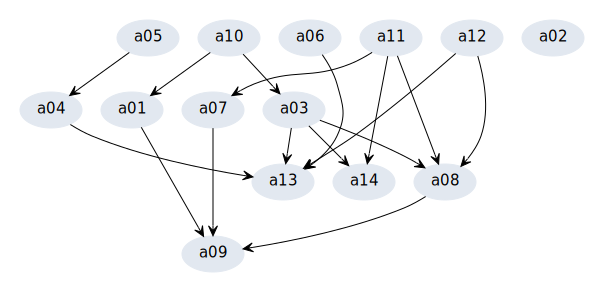

In [6]:
from hassediagram.hasse_diagram import hasse_graphviz
hasse_graphviz(df_relations.values, df.index)

# Standarization

In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA

In [8]:
N_COMPONENTS = 2

pca = PCA(n_components=N_COMPONENTS)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), index=df.index, columns=range(N_COMPONENTS))
print(pca.explained_variance_ratio_)
df_pca

[0.44298066 0.31153263]


,0,1
a01,0.243925,1.773592
a02,-1.676446,2.325448
a03,1.638356,0.394646
a04,-1.797365,-0.963997
a05,-1.254374,-0.929392
a06,-2.805310,-0.210164
a07,1.928345,-0.871992
a08,0.246307,-1.315961
a09,0.756357,-1.417312
a10,0.405999,2.130835


In [9]:
CRITERIA = [Criterion(name, points=2) for name in df_pca.columns]
df_relations_pca = uta_gms(df_pca, PREFERENCES, CRITERIA)
print(df_relations_pca.sum().sum())
df_relations_pca

98


,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14
a01,1,0,1,1,1,1,1,1,1,0,1,1,1,1
a02,1,1,1,1,1,1,1,1,1,0,1,1,1,1
a03,0,0,1,1,1,1,1,1,1,0,1,0,1,1
a04,0,0,0,1,0,0,0,0,0,0,0,0,1,0
a05,0,0,0,1,1,0,0,1,1,0,0,0,1,0
a06,0,0,0,1,1,1,0,1,1,0,0,0,1,0
a07,0,0,0,1,1,0,1,1,1,0,0,0,1,0
a08,0,0,0,0,0,0,0,1,1,0,0,0,0,0
a09,0,0,0,0,0,0,0,0,1,0,0,0,0,0
a10,1,0,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
df_extreme_pca = extreme_ranking(df_pca, PREFERENCES, CRITERIA)
df_extreme_pca

,best,worst
a01,3,3
a02,1,2
a03,5,5
a04,11,13
a05,10,10
a06,7,9
a07,8,9
a08,11,13
a09,12,14
a10,1,2


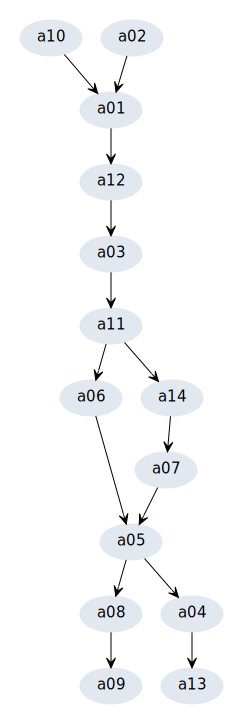

In [11]:
from hassediagram.hasse_diagram import hasse_graphviz
hasse_graphviz(df_relations_pca.values, df.index)

# t-SNE

In [12]:
tsne = TSNE(n_components=N_COMPONENTS, perplexity=10)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled), index=df.index, columns=range(N_COMPONENTS))
df_tsne

,0,1
a01,13.291439,-15.414589
a02,-7.297515,-9.496221
a03,32.599518,-22.721209
a04,19.593143,25.731983
a05,22.794508,8.869997
a06,4.691143,16.100023
a07,51.388363,-18.480846
a08,39.820404,-0.819615
a09,53.049259,8.130645
a10,6.334501,-28.709702


In [13]:
CRITERIA = [Criterion(name, points=2) for name in df_tsne.columns]
df_relations_tsne = uta_gms(df_tsne, PREFERENCES, CRITERIA)
print(df_relations_tsne.sum().sum())
df_relations_tsne

196


,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14
a01,1,1,1,1,1,1,1,1,1,1,1,1,1,1
a02,1,1,1,1,1,1,1,1,1,1,1,1,1,1
a03,1,1,1,1,1,1,1,1,1,1,1,1,1,1
a04,1,1,1,1,1,1,1,1,1,1,1,1,1,1
a05,1,1,1,1,1,1,1,1,1,1,1,1,1,1
a06,1,1,1,1,1,1,1,1,1,1,1,1,1,1
a07,1,1,1,1,1,1,1,1,1,1,1,1,1,1
a08,1,1,1,1,1,1,1,1,1,1,1,1,1,1
a09,1,1,1,1,1,1,1,1,1,1,1,1,1,1
a10,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
from hassediagram.hasse_diagram import hasse_graphviz
hasse_graphviz(df_relations_tsne.values, df.index)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f49bd03c250>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


# MDS

In [14]:
mds = MDS(n_components=N_COMPONENTS)
df_mds = pd.DataFrame(mds.fit_transform(df_scaled), index=df.index, columns=range(N_COMPONENTS))
df_mds

,0,1
a01,0.106307,-2.243193
a02,2.763938,-1.977878
a03,-1.582184,-1.304888
a04,1.611899,1.375665
a05,1.160797,0.915478
a06,2.845321,0.954319
a07,-2.380921,0.254940
a08,-0.480909,1.258498
a09,-1.100322,1.465728
a10,0.438301,-2.110975


In [15]:
CRITERIA = [Criterion(name, points=2) for name in df_mds.columns]
df_relations_mds = uta_gms(df_mds, PREFERENCES, CRITERIA)
print(df_relations_mds.sum().sum())
df_relations_mds

73


,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14
a01,1,0,0,0,0,0,0,0,0,0,0,0,0,0
a02,1,1,1,0,0,0,0,0,0,1,1,1,0,0
a03,0,0,1,0,0,0,0,0,0,0,0,0,0,0
a04,1,0,1,1,1,0,1,1,1,1,1,1,0,1
a05,1,0,1,0,1,0,1,1,1,1,1,1,0,1
a06,1,1,1,1,1,1,1,1,1,1,1,1,0,1
a07,0,0,0,0,0,0,1,0,0,0,0,0,0,0
a08,0,0,1,0,0,0,1,1,1,0,1,0,0,1
a09,0,0,1,0,0,0,1,0,1,0,1,0,0,1
a10,1,0,1,0,0,0,0,0,0,1,0,0,0,0


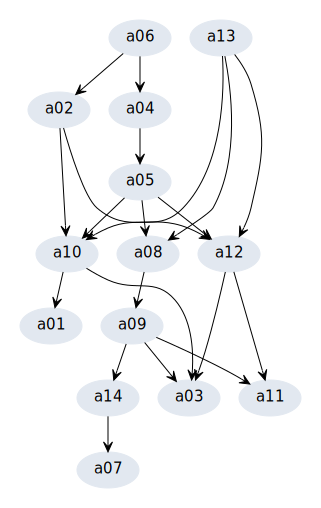

In [16]:
from hassediagram.hasse_diagram import hasse_graphviz
hasse_graphviz(df_relations_mds.values, df.index)